### DS INTERN TASK - 1832011_DS

##### **Importing The Lbraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
listings_df = pd.read_csv('/content/listings.csv')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [ ]:
listings_df.shape

(10272, 16)

##### **Geopandas and Geojson**

In [ ]:
!pip install geopandas

In [ ]:
!pip install geojsonio

##### **TOP AREAS WITH HIGHEST NUMBER OF LISTING**

In [ ]:
import geopandas as gpd

nhood_json = gpd.read_file('neighbourhoods.geojson')
nhood_json.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [ ]:
nhood_json = nhood_json.sort_values('neighbourhood')
nhood_json.head()

,neighbourhood,neighbourhood_group,geometry
43,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
14,78702,None,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
19,78703,None,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
29,78704,None,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
31,78705,None,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."


In [ ]:
listings_df = listings_df.sort_values('neighbourhood')

In [ ]:
sample_df = listings_df.groupby(['neighbourhood']).count()

In [ ]:
sample_df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
78701,713,713,713,713,0,713,713,713,713,713,713,420,420,713,713
78702,1263,1263,1263,1263,0,1263,1263,1263,1263,1263,1263,1043,1043,1263,1263
78703,530,530,530,530,0,530,530,530,530,530,530,403,403,530,530
78704,1822,1822,1822,1821,0,1822,1822,1822,1822,1822,1822,1463,1463,1822,1822
78705,505,505,505,505,0,505,505,505,505,505,505,360,360,505,505


In [ ]:
nhood_json['count'] = sample_df['id']
for i in range(len(nhood_json)):
  nhood_json['count'][i] = i

nhood_json

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,neighbourhood,neighbourhood_group,geometry,count
43,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",43.0
14,78702,None,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",14.0
19,78703,None,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",19.0
29,78704,None,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",29.0
31,78705,None,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",31.0
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ...",7.0
20,78717,None,"MULTIPOLYGON (((-97.70740 30.47482, -97.70753 ...",20.0
16,78719,None,"MULTIPOLYGON (((-97.65158 30.20143, -97.65287 ...",16.0
40,78721,None,"MULTIPOLYGON (((-97.66540 30.28564, -97.66598 ...",40.0
18,78722,None,"MULTIPOLYGON (((-97.70395 30.28257, -97.70555 ...",18.0


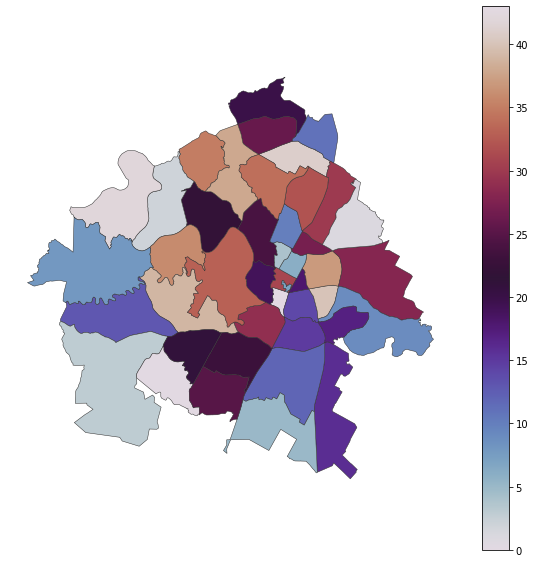

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')

fig = nhood_json.plot(column = 'count', cmap='twilight', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

In [ ]:
nhood_json = nhood_json.sort_values('count', ascending=False)

nhood_json.head(10)

,neighbourhood,neighbourhood_group,geometry,count
43,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",43.0
42,78734,None,"MULTIPOLYGON (((-97.92086 30.43496, -97.92067 ...",42.0
41,78727,None,"MULTIPOLYGON (((-97.69729 30.44004, -97.69676 ...",41.0
40,78721,None,"MULTIPOLYGON (((-97.66540 30.28564, -97.66598 ...",40.0
39,78735,None,"MULTIPOLYGON (((-97.86241 30.29700, -97.86216 ...",39.0
38,78750,None,"MULTIPOLYGON (((-97.79105 30.45049, -97.79087 ...",38.0
37,78723,None,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",37.0
36,78733,None,"MULTIPOLYGON (((-97.84295 30.32310, -97.84274 ...",36.0
35,78726,None,"MULTIPOLYGON (((-97.82580 30.45545, -97.82479 ...",35.0
34,78759,None,"MULTIPOLYGON (((-97.74744 30.42162, -97.74721 ...",34.0


##### **Broken down by ROOM_TYPE**

In [ ]:
sample_df1 = listings_df.copy()

In [ ]:
sample_df1 = sample_df1.drop(['neighbourhood_group'], axis=1)
sample_df1

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5026,24627763,Stylish New Downtown Condo with Bikes,126005498,Britta,78701,30.27734,-97.74748,Entire home/apt,167,2,149,2021-02-08,4.38,2,123
7988,41741178,"Austin Staycation, City Center, Parking Included!",12355671,Transitions,78701,30.26424,-97.74552,Entire home/apt,199,30,2,2020-09-06,0.36,15,0
7984,41726188,AMAZING DOWNTOWN 1BDR,329519772,Taron,78701,30.26956,-97.74738,Entire home/apt,320,1,0,NaN,NaN,1,90
593,2273498,Austin's Downtown Speakeasy Hotel,4929310,Ryan,78701,30.26574,-97.73932,Entire home/apt,131,2,134,2021-01-10,1.59,29,326
6230,32516488,SXSW Downtown Loft steps from 6th St & SXSW Ev...,90995149,Cheri,78701,30.26667,-97.73704,Entire home/apt,385,2,3,2019-11-03,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,33609676,Secluded Luxury Two Bedroom Suite in Great Hills,154866491,Chris,78759,30.39949,-97.76938,Entire home/apt,420,2,5,2020-09-20,0.85,1,364
3626,19204907,"Condo in Gated Complex near Domain, King Bed",134370722,Sophie,78759,30.37849,-97.73944,Entire home/apt,81,30,7,2021-02-05,0.23,1,136
132,342243,Spacious Private Master Suite by the Month.,1736662,Teresa,78759,30.41699,-97.75440,Private room,34,31,3,2020-02-13,0.10,1,272
3769,20147722,Beautiful Central Austin Home (Domain Area),128277102,Tirso,78759,30.41306,-97.73111,Entire home/apt,288,30,5,2019-03-14,0.14,1,358


In [ ]:
merge = sample_df1.set_index('neighbourhood').join(nhood_json.set_index('neighbourhood'))

In [ ]:
merge.head()

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,geometry,count
neighbourhood,,,,,,,,,,,,,,,,,
78701,24627763,Stylish New Downtown Condo with Bikes,126005498,Britta,30.27734,-97.74748,Entire home/apt,167,2,149,2021-02-08,4.38,2,123,None,None,NaN
78701,41741178,"Austin Staycation, City Center, Parking Included!",12355671,Transitions,30.26424,-97.74552,Entire home/apt,199,30,2,2020-09-06,0.36,15,0,None,None,NaN
78701,41726188,AMAZING DOWNTOWN 1BDR,329519772,Taron,30.26956,-97.74738,Entire home/apt,320,1,0,NaN,NaN,1,90,None,None,NaN
78701,2273498,Austin's Downtown Speakeasy Hotel,4929310,Ryan,30.26574,-97.73932,Entire home/apt,131,2,134,2021-01-10,1.59,29,326,None,None,NaN
78701,32516488,SXSW Downtown Loft steps from 6th St & SXSW Ev...,90995149,Cheri,30.26667,-97.73704,Entire home/apt,385,2,3,2019-11-03,0.13,1,0,None,None,NaN


In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')

fig = merge.plot(column='room_type', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

##### **TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS**

In [ ]:
sample_df2 = pd.DataFrame(listings_df['host_id'])
sample_df2['host_name'] = listings_df['host_name']

In [ ]:
sample_df2 = sample_df2.drop_duplicates()

In [ ]:
sample_df2 = sample_df2.sort_values('host_id')

In [ ]:
sample_df2.reset_index(inplace = True)
sample_df2 = sample_df2.drop(['index'], axis=1)

In [ ]:
sample_df2.head()

,host_id,host_name
0,23,Charlene
1,2466,Paddy
2,2757,Olivia
3,4569,Glory
4,7148,Peggy


In [ ]:
sample_df2.shape

(6773, 2)

In [ ]:
sample_df3 = listings_df.copy()
sample_df3 = sample_df2.sort_values('host_name')

In [ ]:
sample_df3 = listings_df.groupby(['host_id']).count()
sample_df3.reset_index(inplace = True)

In [ ]:
sample_df3.head()

,host_id,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23,3,3,3,0,3,3,3,3,3,3,3,2,2,3,3
1,2466,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3
2,2757,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,4569,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1
4,7148,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
sample_df3.shape

(6773, 16)

In [ ]:
sample_df2['listing'] = sample_df3['id']
for i in range(4955):
  sample_df2['listing'][i] = sample_df3['id'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sample_df2 = sample_df2.sort_values('listing', ascending=False)

print('TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS')
sample_df.head(10)

TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS


,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
78701,713,713,713,713,0,713,713,713,713,713,713,420,420,713,713
78702,1263,1263,1263,1263,0,1263,1263,1263,1263,1263,1263,1043,1043,1263,1263
78703,530,530,530,530,0,530,530,530,530,530,530,403,403,530,530
78704,1822,1822,1822,1821,0,1822,1822,1822,1822,1822,1822,1463,1463,1822,1822
78705,505,505,505,505,0,505,505,505,505,505,505,360,360,505,505
78712,2,2,2,2,0,2,2,2,2,2,2,1,1,2,2
78717,74,74,74,74,0,74,74,74,74,74,74,43,43,74,74
78719,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4
78721,204,204,204,204,0,204,204,204,204,204,204,170,170,204,204
